In [28]:
import pandas as pd
import numpy as np
# 서포트벡터머신 모델 패키지 불러오기
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

for f in fm.fontManager.ttflist:
    if 'NanumBarunGothic' in f.fname:
        plt.rcParams['font.family'] = 'NanumBarunGothic' # 폰트를 나눔고딕으로
print(plt.rcParams['font.family'])
matplotlib.rcParams['axes.unicode_minus'] = False #'-'기호 제대로 나오게함

['NanumBarunGothic']


<h3>데이터 구성하기<h3>

In [29]:
df_breast = pd.read_csv("../data/cancer.csv",encoding = "euc-kr")
df_breast.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
# 결측치 확인
df_breast.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [31]:
df_breast_x = df_breast.drop("diagnosis",axis = 1 )
df_breast_y = df_breast["diagnosis"]

In [32]:
df_breast_x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<h3>데이터 분할<h3>

In [33]:
x= df_breast_x
y= df_breast_y
x_tr,x_test,y_tr,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1234)

print("train data x size : {}".format(x_tr.shape))
print("train data y size : {}".format(y_tr.shape))
print("test data x size : {}".format(x_test.shape))
print("test data y size : {}".format(y_test.shape))

train data x size : (398, 30)
train data y size : (398,)
test data x size : (171, 30)
test data y size : (171,)


<h3>기본 옵션으로 SVC 모델 생성<h3>

In [34]:
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(x_tr,y_tr)

print("accuracy on train set: {:.3f}".format(svm_uncustomized.score(x_tr,y_tr)))
print("accuracy on test set: {:.3f}".format(svm_uncustomized.score(x_test,y_test)))


accuracy on train set: 1.000
accuracy on test set: 0.614


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<h3>SVC 모델 파라미터 변경<h3>
 - C:규제에 대한 강도 변경

In [35]:
# svm
train_accuracy = []
test_accuracy = []
para_C = []
for C in range(15):
    svm1_scaled = SVC(C= (C+1)/10, random_state = 1234)
    svm1_scaled.fit(x_tr,y_tr)
    para_C.append((C+1)/10)
    train_accuracy.append(svm1_scaled.score(x_tr,y_tr))
    test_accuracy.append(svm1_scaled.score(x_test,y_test))

df_accuracy1 = pd.DataFrame()
df_accuracy1["C"] = para_C
df_accuracy1["TrainAccuracy"] = train_accuracy
df_accuracy1["TestAccuracy"] = test_accuracy
df_accuracy1

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

,C,TrainAccuracy,TestAccuracy
0,0.1,0.633166,0.614035
1,0.2,0.633166,0.614035
2,0.3,0.633166,0.614035
3,0.4,0.633166,0.614035
4,0.5,0.633166,0.614035
5,0.6,0.633166,0.614035
6,0.7,1.000000,0.614035
7,0.8,1.000000,0.614035
8,0.9,1.000000,0.614035
9,1.0,1.000000,0.614035


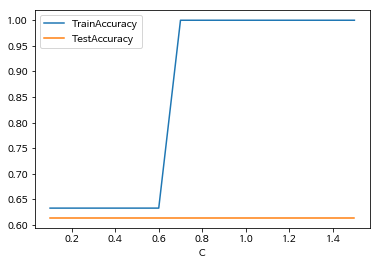

In [36]:
df_accuracy1.set_index("C",inplace = False).plot.line()

<h3>Gamma : 훈련샘플이 미치는 영향의 범위를 변경 결과 <h3>

In [37]:
train_accuracy = []
test_accuracy = []
para_gamma = []

for gamma in range(1,10):
    svm2 = SVC(gamma = gamma/10, random_state = 1234)
    svm2.fit(x_tr,y_tr)
    para_gamma.append(gamma/10)
    train_accuracy.append(svm2.score(x_tr,y_tr))
    test_accuracy.append(svm2.score(x_test,y_test))

df_accuracy2 = pd.DataFrame()
df_accuracy2["Gamma"] = para_gamma
df_accuracy2["TrainAccuracy"] = train_accuracy
df_accuracy2["TestAccuracy"] = test_accuracy
df_accuracy2

,Gamma,TrainAccuracy,TestAccuracy
0,0.1,1.0,0.614035
1,0.2,1.0,0.614035
2,0.3,1.0,0.614035
3,0.4,1.0,0.614035
4,0.5,1.0,0.614035
5,0.6,1.0,0.614035
6,0.7,1.0,0.614035
7,0.8,1.0,0.614035
8,0.9,1.0,0.614035


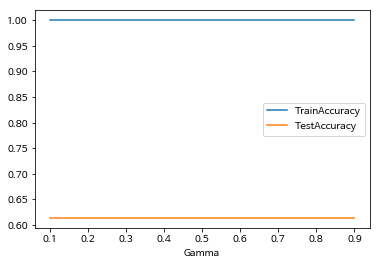

In [38]:
df_accuracy2.set_index("Gamma",inplace = False).plot.line()
# Gamma별 정확도 그래프로 확인
# Gamma가 0.3일때, 가장 test_accuracy가 높다

<h3> 중요! SVM은 scale에 영향을 많이 받는다.<h3>

<h4> scale: 설명변수 값의 구간을 동일하게 변경한다. <h4>

In [39]:
# 스케일 적용
x_tr_scaled = scale(x_tr,axis =0)
x_test_scaled = scale(x_test,axis= 0)

pd.DataFrame(x_tr_scaled,columns = x_tr.columns).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-1.537538,-0.555548,-1.519860,-1.202355,0.513983,-0.567464,-1.120375,-1.249209,0.620657,1.172660,...,-1.276643,-0.472874,-1.300672,-1.011696,0.548118,-0.768557,-1.277839,-1.733444,-0.771425,0.221296
1,-0.796097,-0.386037,-0.813568,-0.734869,-0.560715,-0.965140,-0.771266,-0.716927,-0.810121,-0.513848,...,-0.680246,1.698160,-0.676490,-0.648918,0.518137,-0.580688,-0.447953,-0.430111,0.089705,-0.363035
2,0.217527,-0.386037,0.185577,0.051241,1.411902,0.489621,0.810195,0.936694,0.516330,-0.082614,...,0.458706,-0.692868,0.400268,0.150331,0.338256,-0.254325,0.259580,0.764436,0.808944,-0.675025
3,0.895158,0.888784,0.765950,0.771536,-0.698209,-0.781438,-0.757719,-0.530122,-0.947982,-1.376316,...,0.727913,0.919350,0.601808,0.588221,-0.394120,-0.662580,-0.722902,-0.499488,-0.760008,-1.004755
4,-0.880801,-0.490530,-0.864427,-0.828931,1.601307,0.049639,-0.610699,-0.167410,0.505152,2.422242,...,-0.961878,-0.803668,-0.942938,-0.844601,1.413263,-0.334411,-0.702280,-0.307839,-0.225064,1.689948


<h4>scale이 조정된 데이터로 새로운 모델 생성<h4>

In [40]:
svm_uncustomized_scaled = SVC(random_state=1234)
svm_uncustomized_scaled.fit(x_tr_scaled,y_tr)

print("accuracy on train set: {:.3f}".format(svm_uncustomized_scaled.score(x_tr_scaled,y_tr)))
print("accuracy on test set: {:.3f}".format(svm_uncustomized_scaled.score(x_test_scaled,y_test)))
# 이전보다 정확도가 높아진 것을 확인할 수 있다.

accuracy on train set: 0.995
accuracy on test set: 0.953


<h3>새로운 SVC모델에 파라미터 변경<h3>
    - C:규제에 대한 강도변경

In [41]:
# svm
train_accuracy = []
test_accuracy = []
para_C = []
for C in range(15):
    svm1_scaled = SVC(C= (C+1), random_state = 1234)
    svm1_scaled.fit(x_tr_scaled,y_tr)
    para_C.append(C+1)
    train_accuracy.append(svm1_scaled.score(x_tr_scaled,y_tr))
    test_accuracy.append(svm1_scaled.score(x_test_scaled,y_test))

df_accuracy1_scaled = pd.DataFrame()
df_accuracy1_scaled["C"] = para_C
df_accuracy1_scaled["TrainAccuracy"] = train_accuracy
df_accuracy1_scaled["TestAccuracy"] = test_accuracy
df_accuracy1_scaled

,C,TrainAccuracy,TestAccuracy
0,1,0.994975,0.953216
1,2,0.997487,0.953216
2,3,0.997487,0.953216
3,4,0.997487,0.953216
4,5,0.997487,0.953216
5,6,0.997487,0.953216
6,7,0.997487,0.953216
7,8,0.997487,0.959064
8,9,0.997487,0.953216
9,10,0.997487,0.953216


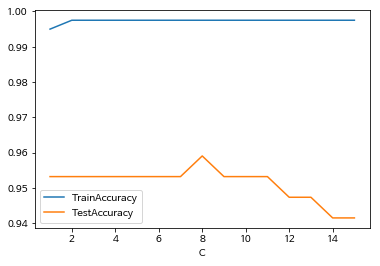

In [42]:
df_accuracy1_scaled.set_index("C",inplace = False).plot.line()
# C = 8일때 가장 높은 테스트 데이터 정확도가 나온다.

<h4>Gamma :훈련샘플이 미치는 영향의 범위를 변경 결과<h4>

In [43]:
train_accuracy = []
test_accuracy = []
para_gamma = []
# gamma를 0.1부터 1까지 0.1단위로 증가
for gamma in range(1,10):
    svm2_scaled = SVC(gamma = gamma/10, random_state = 1234)
    svm2_scaled.fit(x_tr_scaled,y_tr)
    para_gamma.append(gamma/10)
    train_accuracy.append(svm2_scaled.score(x_tr_scaled,y_tr))
    test_accuracy.append(svm2_scaled.score(x_test_scaled,y_test)) 
# 생성된 모델의 정확도 테이블 생성
df_accuracy2_scaled = pd.DataFrame()
df_accuracy2_scaled["Gamma"] = para_gamma
df_accuracy2_scaled["TrainAccuracy"] = train_accuracy
df_accuracy2_scaled["TestAccuracy"] = test_accuracy
df_accuracy2_scaled.round(3)


,Gamma,TrainAccuracy,TestAccuracy
0,0.1,0.997,0.918
1,0.2,0.997,0.912
2,0.3,0.997,0.912
3,0.4,0.997,0.877
4,0.5,1.000,0.784
5,0.6,1.000,0.690
6,0.7,1.000,0.649
7,0.8,1.000,0.626
8,0.9,1.000,0.620


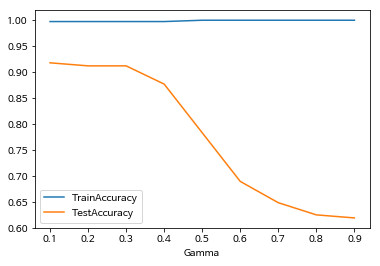

In [44]:
# gamma별 정확도 그래프로 확인
df_accuracy2_scaled.set_index("Gamma",inplace = False).plot.line()
# gamma가 0.3 일때, 테스트 데이터 정확도가 안정적이다.

scale 된 train 데이터와 test데이터로 그래프 분석 후 결정한 최적의 파라미터: C= 8, gamma = 0.3

In [45]:
svm_final = SVC(C=8,gamma = 0.3,random_state= 1234)
svm_final.fit(x_tr_scaled,y_tr)

print("accuracy on train set: {:.3f}".format(svm_final.score(x_tr_scaled,y_tr)))
print("accuracy on test set: {:.3f}".format(svm_final.score(x_test_scaled,y_test)))
# 최적의 파라미터 찾기 이전에 결과가 더 높게 나온다.. 즉, 파라미터를 디폴트값으로 했을때가 더 높다.

accuracy on train set: 1.000
accuracy on test set: 0.912


In [46]:
svm_model = SVC(C=8,gamma = 0.3,random_state= 1234)
svm_model.fit(x_tr_scaled,y_tr)

y_pred = svm_model.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred))


0.9122807017543859


<h2>GridSearchCV 로 최적의 파라미터 탐색 <h2>

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
x = x_tr_scaled
y = y_tr
svc = SVC()

params_grid = {'C' : [i+1 for i in range(15)],'gamma':[i+1/10 for i in range(10)],'kernel':['rbf','linear','poly','sigmoid']} 
# 최적의 파라미터: 최적의 이웃 수:6
grid_search = GridSearchCV(svc,param_grid=params_grid)
grid_search.fit(x,y)

print("Best_score : {}".format(grid_search.best_score_))
print("Best_params: {}".format(grid_search.best_params_))
                            
# gridsearcv 결과 최적의 from sklearn.metrics import accuracy_score파라미터 c = 4, gamma = 0.1 ,kernel = linear

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best_score : 0.9849246231155779
Best_params: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}


In [48]:
svm_best_model = SVC(C=1,gamma=0.1,kernel = 'linear',random_state=1234)
# 마지막의 예측 정확도 비교는 test 데이터로 하므로, test데이터로 fit하고, 다
# 마지막에 test데이터로 예측한 결과와 실제 test데이터를 비교하여 정확도를 얻는다.
svm_best_model.fit(x_tr_scaled,y_tr) # 피팅하는 데이터가 train

y_pred = svm_best_model.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred)) 

0.9649122807017544


<h2>ROC곡선<h2>

In [52]:
from sklearn.metrics import roc_auc_score,roc_curve


print("Roc AUC: {}".format(roc_auc_score(y_test,svm_best_model.predict(x_test_scaled))))
fpr, tpr, thresholds = roc_curve(y_test,svm_best_model.decision_function(x_test_scaled))


Roc AUC: 0.9601731601731602


In [56]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         0.01515152 0.01515152 0.03030303
 0.03030303 0.06060606 0.06060606 0.10606061 0.10606061 0.12121212
 0.12121212 1.        ]
[0.         0.00952381 0.61904762 0.61904762 0.85714286 0.85714286
 0.95238095 0.95238095 0.98095238 0.98095238 0.99047619 0.99047619
 1.         1.        ]
[ 1.35810367e+01  1.25810367e+01  4.61217411e+00  4.38676887e+00
  2.10531557e+00  1.89173859e+00  9.38071477e-01  7.49874109e-01
  3.43156104e-02 -3.34936151e-01 -4.31801465e-01 -4.69144698e-01
 -7.60042742e-01 -4.20365916e+01]


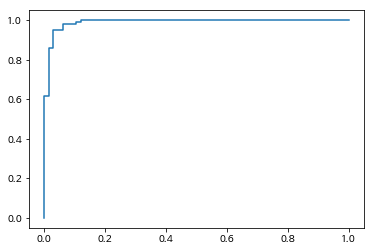

In [53]:
plt.plot(fpr,tpr)
# ROC 결과 모델의 성능이 좋은것으로 나왔다.